In [82]:
import pymysql as db
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import pprint
import re

In [31]:
CATEGORIES = ['ANIMAL','GAME','MOVIE','MUKBANG','SPORTS']

In [74]:
local = 'team0402.c43ypw0liaa2.ap-northeast-2.rds.amazonaws.com'  # aws rds 접근
con = db.connect(
    host=local,
    user='team0402',
    db='Team0402_Youtube',
    password='team0402',
    charset='utf8mb4'
)
cur = con.cursor()

In [106]:
cur.execute("select * from TB_CHANNEL_INFO;")  
# 큰따옴표 안에 쿼리문 넣으시면 튜플 형태로 반환합니다.
channel_data = cur.fetchall()
channel_data

(('MUKBANG',
  'UC-i2ywiuvjvpTy2zW-tXfkw',
  '떵개떵',
  'https://yt3.ggpht.com/ytc/AGIKgqP2Ij1bucFc1-uRmQREOxNMsqssT8cXjJSdNGWg=s800-c-k-c0x00ffffff-no-rj',
  4890000,
  4917,
  2986171942),
 ('ANIMAL',
  'UC22go5LdQEw-iDuxFb4C0hw',
  'SBS TV동물농장x애니멀봐',
  'https://yt3.ggpht.com/PFxInKn471tSEbMbVYjD6ywZQNf4YeOy9XcHzcdWDpO0zT27bZoYliIIMuBVXmHBTX0jVaPP=s800-c-k-c0x00ffffff-no-rj',
  4830000,
  4183,
  4646738434),
 ('ANIMAL',
  'UC29-IlHm6kbDB1ox8GthODw',
  '매탈남',
  'https://yt3.ggpht.com/ytc/AGIKgqPDX87tnwyAWmJs2De654cOIhr5uIndy0tIVTklzw=s800-c-k-c0x00ffffff-no-rj',
  412000,
  552,
  149372386),
 ('MUKBANG',
  'UC2fsxQr6Hcx1enORxXgKpxQ',
  'Jane ASMR 제인',
  'https://yt3.ggpht.com/ytc/AGIKgqOJpj1wtMAM3hJcZ1wlh55BGGH1SJJjT3CAQoHaPQ=s800-c-k-c0x00ffffff-no-rj',
  17600000,
  2095,
  7235423583),
 ('GAME',
  'UC2NFRq9s2neD_Ml0tPhNC2Q',
  '우주하마',
  'https://yt3.ggpht.com/ytc/AGIKgqMyrguU_aX44LRiRrMMdBezVfVvBlaGw-OIyFMq8A=s800-c-k-c0x00ffffff-no-rj',
  1690000,
  2302,
  1172920053),
 ('MUKBANG

In [107]:
cur.execute("select C.category, C.channel_id, C.channel_name, C.subscribers_count, C.total_view, C.videos_count, V.video_id, V.video_title, V.uploaded_date, V.view_count, V.like_count, V.comment_count from TB_CHANNEL_INFO as C, TB_VIDEO_INFO as V where C.channel_id = V.channel_id and C.category = 'MUKBANG';")  
# 큰따옴표 안에 쿼리문 넣으시면 튜플 형태로 반환합니다.
row_data = cur.fetchall()
row_data

(('MUKBANG',
  'UC-i2ywiuvjvpTy2zW-tXfkw',
  '떵개떵',
  4890000,
  2986171942,
  4917,
  '_HXgnzEXmvs',
  '마라탕에 4종류면 추가해서 크림통새우튀김 먹방~!! 리얼사운드 ASMR Mukbang(Eating Show)',
  datetime.datetime(2023, 3, 18, 12, 0, 22),
  145857,
  2884,
  118),
 ('MUKBANG',
  'UC-i2ywiuvjvpTy2zW-tXfkw',
  '떵개떵',
  4890000,
  2986171942,
  4917,
  '_lTAbrYXj6M',
  '얼큰하게 끝내주는 열라면 먹방~!! 리얼사운드 ASMR Mukbang(Eating Show)',
  datetime.datetime(2023, 3, 12, 12, 0, 19),
  214575,
  3802,
  181),
 ('MUKBANG',
  'UC-i2ywiuvjvpTy2zW-tXfkw',
  '떵개떵',
  4890000,
  2986171942,
  4917,
  '1QM0uW8B6Vk',
  '황금올리브닭다리 양념만 잔뜩 쌓아서 먹어보자~!! 리얼사운드  ASMR Mukbang(Eating Show)',
  datetime.datetime(2023, 3, 23, 12, 0, 1),
  186557,
  3697,
  170),
 ('MUKBANG',
  'UC-i2ywiuvjvpTy2zW-tXfkw',
  '떵개떵',
  4890000,
  2986171942,
  4917,
  '27MfBtsVdHs',
  '한번씩 땡기는 파닭과 츄러스치즈볼 먹방~!! 리얼사운드 ASMR Mukbang(Eating Show)',
  datetime.datetime(2023, 2, 28, 12, 0),
  130178,
  2771,
  122),
 ('MUKBANG',
  'UC-i2ywiuvjvpTy2zW-tXfkw',
  '떵개떵',
  4890000,

In [108]:
channel_df = pd.DataFrame(columns=['카테고리','채널id','채널이름','로고','구독자수','영상개수','총조회수'])
for i in range(len(channel_data)):
    channel_df.loc[i] = channel_data[i]

In [109]:
channel_df

,카테고리,채널id,채널이름,로고,구독자수,영상개수,총조회수
0,MUKBANG,UC-i2ywiuvjvpTy2zW-tXfkw,떵개떵,https://yt3.ggpht.com/ytc/AGIKgqP2Ij1bucFc1-uR...,4890000,4917,2986171942
1,ANIMAL,UC22go5LdQEw-iDuxFb4C0hw,SBS TV동물농장x애니멀봐,https://yt3.ggpht.com/PFxInKn471tSEbMbVYjD6ywZ...,4830000,4183,4646738434
2,ANIMAL,UC29-IlHm6kbDB1ox8GthODw,매탈남,https://yt3.ggpht.com/ytc/AGIKgqPDX87tnwyAWmJs...,412000,552,149372386
3,MUKBANG,UC2fsxQr6Hcx1enORxXgKpxQ,Jane ASMR 제인,https://yt3.ggpht.com/ytc/AGIKgqOJpj1wtMAM3hJc...,17600000,2095,7235423583
4,GAME,UC2NFRq9s2neD_Ml0tPhNC2Q,우주하마,https://yt3.ggpht.com/ytc/AGIKgqMyrguU_aX44LRi...,1690000,2302,1172920053
5,MUKBANG,UC4PpFUrfT2Pou7OwpVF0MUQ,쏘영 Ssoyoung,https://yt3.ggpht.com/ytc/AGIKgqNnxPHaefcEyyaq...,9750000,787,1484077916
6,SPORTS,UC4yq3FWEWqMvFNFBsV3gbKQ,힙으뜸,https://yt3.ggpht.com/jbuzWHmv6P9u7qlDB4NVxD8Y...,1520000,454,486924967
7,MOVIE,UC79hJz6y1EEiIkwfHOuWC4w,김시선,https://yt3.ggpht.com/ytc/AGIKgqPUJq9j0wa-ab5c...,1580000,564,646554375
8,MOVIE,UCaHGOzOyeYzLQeKsVkfLEGA,지무비 : G Movie,https://yt3.ggpht.com/ytc/AGIKgqMq1Jd-AoSuVFSB...,2870000,487,1221561945
9,MUKBANG,UCbzI92w5vWa6mEj1dACfy6g,푸메Fume,https://yt3.ggpht.com/WpSjRGFub8cqzGxbaOpossqv...,5350000,664,1192649807


In [135]:
video_df = pd.DataFrame(columns=['카테고리','채널Id','채널이름','subscribers_count','total_views','videos_count','영상id','영상제목','업로드날짜',
                                    '조회수','좋아요','댓글'])
for i in range(len(row_data)):
    video_df.loc[i] = row_data[i]

In [136]:
merged_df = video_df

In [ ]:
merged_df.groupby(pd.)

In [122]:
grouped_df = merged_df.groupby(['채널Id', pd.Grouper(key='업로드날짜', freq='D')]).sum().reset_index()
grouped_df

,채널Id,업로드날짜,카테고리,채널이름,subscribers_count,total_views,videos_count,영상id,영상제목,조회수,좋아요,댓글
0,UC-i2ywiuvjvpTy2zW-tXfkw,2023-01-17,MUKBANG,떵개떵,4890000,2986171942,4917,HU31ZC5GA4I,추억의 옛날즉석떡볶이에 쫄면사리추가! 그리고 꼬마김밥 먹방~!! 리얼사운드 ASM...,213588,4410,161
1,UC-i2ywiuvjvpTy2zW-tXfkw,2023-01-18,MUKBANG,떵개떵,4890000,2986171942,4917,fnew9mjHvn8,"최고의 궁합! 순두부틈새라면과 삼각김밥, 소세지 먹방~!! 리얼사운드 ASMR Mu...",242060,4797,162
2,UC-i2ywiuvjvpTy2zW-tXfkw,2023-01-19,MUKBANG,떵개떵,4890000,2986171942,4917,kXeOLyITVS4,버거킹 빅사이즈 스태커3 와퍼 5개 먹방~~!! 리얼사운드 ASMR Mukbang...,246073,4733,202
3,UC-i2ywiuvjvpTy2zW-tXfkw,2023-01-20,MUKBANG,떵개떵,4890000,2986171942,4917,2KKJVhHu18Q,제철 딸기가 가득 들어간 딸기화채 먹방~!! 리얼사운드 ASMR Mukbang(Ea...,181729,3355,131
4,UC-i2ywiuvjvpTy2zW-tXfkw,2023-01-21,MUKBANG,떵개떵,4890000,2986171942,4917,qumz4DAT2M0,어니언치킨에 꾸덕한 까르보나라파스타 먹방~!! 리얼사운드 ASMR Mukbang(E...,202036,4024,187
...,...,...,...,...,...,...,...,...,...,...,...,...
723,UCxtLc0Jqq3SKBWlIXM_OC9g,2023-04-24,MUKBANG,Hongyu ASMR 홍유,14900000,4965241212,628,p8iN5m-FYzY,"ASMR RAINBOW STRAWBERRY KOHAKUTO, WATERMELON I...",586069,5208,190
724,UCxtLc0Jqq3SKBWlIXM_OC9g,2023-04-26,MUKBANG,Hongyu ASMR 홍유,14900000,4965241212,628,fVUhANdsccA,ASMR EXOTIC FRUITS *KOREAN CHERRY WATERMELON M...,297340,4684,183
725,UCxtLc0Jqq3SKBWlIXM_OC9g,2023-04-28,MUKBANG,Hongyu ASMR 홍유,14900000,4965241212,628,Y4g9kEjKxqs,"ASMR RAINBOW HONEYCOMB, TANGHULU, KOHAKUTO, ED...",408719,4700,164
726,UCxtLc0Jqq3SKBWlIXM_OC9g,2023-04-30,MUKBANG,Hongyu ASMR 홍유,14900000,4965241212,628,wVouO-jJWIE,"ASMR RAW SEAFOOD 육회, 연어, 뿔소라, 해삼, 멍게 손질 SALMON...",214437,5715,160


In [137]:
merged_df['업로드날짜'] = pd.to_datetime(merged_df['업로드날짜'])
merged_df.set_index('업로드날짜', inplace=True)

merged_df

,카테고리,채널Id,채널이름,subscribers_count,total_views,videos_count,영상id,영상제목,조회수,좋아요,댓글
업로드날짜,,,,,,,,,,,
2023-03-18 12:00:22,MUKBANG,UC-i2ywiuvjvpTy2zW-tXfkw,떵개떵,4890000,2986171942,4917,_HXgnzEXmvs,마라탕에 4종류면 추가해서 크림통새우튀김 먹방~!! 리얼사운드 ASMR Mukban...,145857,2884,118
2023-03-12 12:00:19,MUKBANG,UC-i2ywiuvjvpTy2zW-tXfkw,떵개떵,4890000,2986171942,4917,_lTAbrYXj6M,얼큰하게 끝내주는 열라면 먹방~!! 리얼사운드 ASMR Mukbang(Eating ...,214575,3802,181
2023-03-23 12:00:01,MUKBANG,UC-i2ywiuvjvpTy2zW-tXfkw,떵개떵,4890000,2986171942,4917,1QM0uW8B6Vk,황금올리브닭다리 양념만 잔뜩 쌓아서 먹어보자~!! 리얼사운드 ASMR Mukban...,186557,3697,170
2023-02-28 12:00:00,MUKBANG,UC-i2ywiuvjvpTy2zW-tXfkw,떵개떵,4890000,2986171942,4917,27MfBtsVdHs,한번씩 땡기는 파닭과 츄러스치즈볼 먹방~!! 리얼사운드 ASMR Mukbang(Ea...,130178,2771,122
2023-01-20 12:00:01,MUKBANG,UC-i2ywiuvjvpTy2zW-tXfkw,떵개떵,4890000,2986171942,4917,2KKJVhHu18Q,제철 딸기가 가득 들어간 딸기화채 먹방~!! 리얼사운드 ASMR Mukbang(Ea...,181729,3355,131
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-10 12:00:41,MUKBANG,UCxtLc0Jqq3SKBWlIXM_OC9g,Hongyu ASMR 홍유,14900000,4965241212,628,yEqshMv987o,"ASMR RAINBOW JELLO SHOOTER, POP IT, KOHAKUTO 무...",1649045,11149,266
2023-02-21 12:00:31,MUKBANG,UCxtLc0Jqq3SKBWlIXM_OC9g,Hongyu ASMR 홍유,14900000,4965241212,628,Zf5CVntBnhw,ASMR SPICY FIRE SALMON CHEESY NOODLES KIELBASA...,426177,8340,206
2022-11-07 12:00:23,MUKBANG,UCxtLc0Jqq3SKBWlIXM_OC9g,Hongyu ASMR 홍유,14900000,4965241212,628,ZNo9u_0g8qk,ASMR RAINBOW DESSERTS KOHAKUTO WATERMELON TANG...,1640284,10001,244


In [138]:
one_week_ago = pd.Timestamp.today().normalize() - pd.Timedelta(days=6)
df_week = merged_df.loc[one_week_ago.strftime('%Y-%m-%d'):]

df_week

,카테고리,채널Id,채널이름,subscribers_count,total_views,videos_count,영상id,영상제목,조회수,좋아요,댓글
업로드날짜,,,,,,,,,,,
2023-05-02 12:00:14,MUKBANG,UC-i2ywiuvjvpTy2zW-tXfkw,떵개떵,4890000,2986171942,4917,Dwn1zFdMKIY,"불닭탕면과 떵순이가 만든 불닭특집 불닭쌈, 불닭팽이 먹방~!! 리얼사운드 ASMR ...",30846,1420,116
2023-04-29 12:00:35,MUKBANG,UC-i2ywiuvjvpTy2zW-tXfkw,떵개떵,4890000,2986171942,4917,lIVjT8pypf8,"[굽네치킨] 볼케이노 닭다리와 고추바사삭순살, 진진짜라, 단무지 먹방~!! 리얼사운...",104554,2817,141
2023-04-30 12:00:40,MUKBANG,UC-i2ywiuvjvpTy2zW-tXfkw,떵개떵,4890000,2986171942,4917,sESE3LcjAGk,오랜만에 모인 떵개떵순 삼남매의 시골에서 부대찌개 먹방~!! 리얼사운드 ASMR M...,94750,2640,217
2023-04-29 13:41:08,MUKBANG,UC2fsxQr6Hcx1enORxXgKpxQ,Jane ASMR 제인,17600000,7235423583,2095,_QkYkC11IN0,ASMR WATERMELON TANGHULU CANDIED STRAWBERRY 수박...,103803,2447,163
2023-05-01 13:37:07,MUKBANG,UC2fsxQr6Hcx1enORxXgKpxQ,Jane ASMR 제인,17600000,7235423583,2095,1SmyVCmoRD8,"ASMR RAINBOW FOODS *EDIBLE DICE, CANDY, UNICOR...",83582,1904,144
2023-04-30 13:52:30,MUKBANG,UC2fsxQr6Hcx1enORxXgKpxQ,Jane ASMR 제인,17600000,7235423583,2095,DTkT6ToYwgc,"ASMR CONVENIENCE STORE *HAMBURGER, FIRE NOODLE...",104316,3256,203
2023-04-29 10:40:12,MUKBANG,UC2fsxQr6Hcx1enORxXgKpxQ,Jane ASMR 제인,17600000,7235423583,2095,FoWsnfq56kc,jelly 젤리 먹방 #shorts,90032,2705,22
2023-05-02 13:39:16,MUKBANG,UC2fsxQr6Hcx1enORxXgKpxQ,Jane ASMR 제인,17600000,7235423583,2095,KyHGzyaIFTc,"ASMR EDIBLE WINDMILL, JELLY GUMMY CANDY 바람개비, ...",17234,890,95
2023-05-01 11:05:44,MUKBANG,UC2fsxQr6Hcx1enORxXgKpxQ,Jane ASMR 제인,17600000,7235423583,2095,rmRx0CBU86s,watermelon 수박 먹방 #shorts,53516,1519,11


C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46021 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45824 missing from current

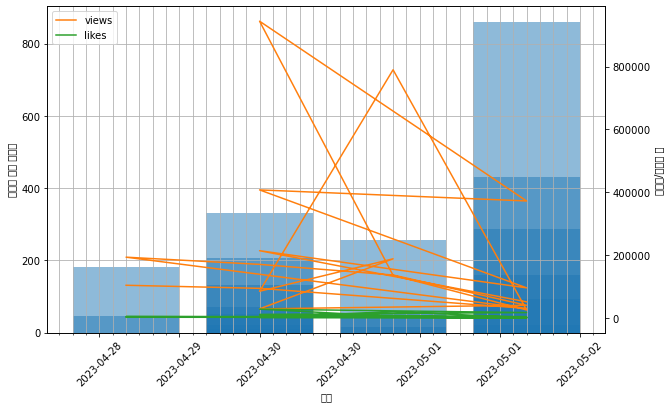

In [129]:
# 중복된 막대와 라인 그래프 그리기
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx() 

ax1.bar(df_week.index, df_week['subscribers_count'] / df_week['조회수'], color='tab:blue', alpha=0.5, label='Views per subscribers count')
ax2.plot(df_week.index, df_week['조회수'], color='tab:orange', label='views')
ax2.plot(df_week.index, df_week['좋아요'], color='tab:green', label='likes')

ax1.set_xlabel('날짜')
ax1.set_ylabel('구독자 대비 조회율')
ax2.set_ylabel('조회수/좋아요 수')

ax1.tick_params(axis='x', rotation=45)
ax1.xaxis.set_major_locator(plt.MaxNLocator(7))  # x축 간격 설정
ax1.xaxis.set_minor_locator(plt.MaxNLocator(49))  # x축 눈금 간격 설정
ax1.grid(True, axis='both', which='both')

# 범례 추가
lns = ax1.get_lines() + ax2.get_lines()
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='best')

plt.show()